In [33]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [34]:
df_train = pd.read_csv("SalaryData_Train(1).csv")
df_test = pd.read_csv("SalaryData_Test(1).csv")

In [35]:
def get_standardized_values(data):
    df_norm = (data-data.min())/(data.max()-data.min())
    return df_norm

In [36]:
df_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [37]:
lblen = LabelEncoder()
df_train["workclass"]=lblen.fit_transform(df_train["workclass"])
df_train["education"]=lblen.fit_transform(df_train["education"])
df_train["maritalstatus"]=lblen.fit_transform(df_train["maritalstatus"])
df_train["occupation"]=lblen.fit_transform(df_train["occupation"])
df_train["relationship"]=lblen.fit_transform(df_train["relationship"])
df_train["race"]=lblen.fit_transform(df_train["race"])
df_train["sex"]=lblen.fit_transform(df_train["sex"])
df_train["relationship"]=lblen.fit_transform(df_train["relationship"])
df_train["native"]=lblen.fit_transform(df_train["native"])
df_train["Salary"]=lblen.fit_transform(df_train["Salary"])
df_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0


In [38]:
df_train["Salary"].value_counts()

0    22653
1     7508
Name: Salary, dtype: int64

In [39]:
df_train.shape

(30161, 14)

In [40]:
#standardized data
df_train=get_standardized_values(df_train)

In [41]:
X_train=df_train.iloc[:,:13]
Y_train=df_train.iloc[:,13]

In [42]:
df_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [43]:
df_test["workclass"]=lblen.fit_transform(df_test["workclass"])
df_test["education"]=lblen.fit_transform(df_test["education"])
df_test["maritalstatus"]=lblen.fit_transform(df_test["maritalstatus"])
df_test["occupation"]=lblen.fit_transform(df_test["occupation"])
df_test["relationship"]=lblen.fit_transform(df_test["relationship"])
df_test["race"]=lblen.fit_transform(df_test["race"])
df_test["sex"]=lblen.fit_transform(df_test["sex"])
df_test["relationship"]=lblen.fit_transform(df_test["relationship"])
df_test["native"]=lblen.fit_transform(df_test["native"])
df_test["Salary"]=lblen.fit_transform(df_test["Salary"])
df_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,0,6,4,7,1,4,1,0,0,30,37,0


In [44]:
#standardized data
df_test=get_standardized_values(df_test)

In [45]:
X_test=df_test.iloc[:,:13]
Y_test=df_test.iloc[:,13]

In [46]:
df_test["Salary"].value_counts()

0.0    11360
1.0     3700
Name: Salary, dtype: int64

In [47]:
df_test.shape

(15060, 14)

In [48]:
model = PCA()
pca_results= model.fit_transform(X_train)

In [49]:
df_newtr=pd.DataFrame(pca_results[:,0:2])
X_train=df_newtr

In [50]:
model = PCA()
pca_results= model.fit_transform(X_test)

In [51]:
df_new=pd.DataFrame(pca_results[:,0:2])
X_test=df_new

In [52]:
model=SVC(kernel='rbf',gamma=100,C=1)
model.fit(X_train,Y_train)

SVC(C=1, gamma=100)

In [53]:
accuracy_score(Y_test,model.predict(X_test))

0.8140770252324038

In [54]:
model = SVC()
param = {'kernel':['rbf'],'gamma' :[50,100,500],'C':[5]}
gs = GridSearchCV(estimator=model,param_grid=param,cv=3)
gs_res=gs.fit(X_train,Y_train)

In [55]:
gs_res.best_params_,gs_res.best_score_

({'C': 5, 'gamma': 500, 'kernel': 'rbf'}, 0.8151256301947137)

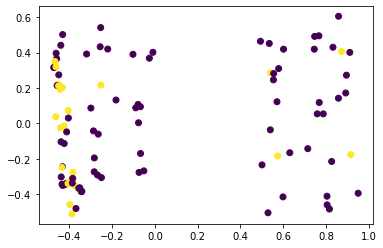

In [56]:
# From figure it is clear that data needs to be projected as data is not linear
plt.scatter(X_train.iloc[100:200,0],X_train.iloc[100:200,1],c=Y_train[100:200])

In [57]:
model=SVC(kernel='rbf',gamma=500,C=5)
model.fit(X_train,Y_train)

SVC(C=5, gamma=500)

In [58]:
accuracy_score(Y_test,model.predict(X_test))

0.8118193891102258

# Hence we create a SVM model with kernel rbf, having gamma value as 500 and penalty on slack variable (C) = 5 which has an accuracy of around 81.2%